<a href="https://colab.research.google.com/github/ikonushok/My_studying_Data-Science-and-Neyro-Nets-on-Python/blob/master/%D0%94%D0%97_6_Ultra__%D0%97%D0%B0%D0%B2%D0%B8%D1%81%D0%B8%D0%BC%D0%BE%D1%81%D1%82%D1%8C_PLZL_%D0%BE%D1%82_%D0%B0%D0%BA%D1%86%D0%B8%D0%B9_%D0%B7%D0%BE%D0%BB%D0%BE%D1%82%D0%BE%D0%B4%D0%BE%D0%B1%D1%8B%D0%B2%D0%B0%D1%8E%D1%89%D0%B8%D1%85_%D0%BA%D0%BE%D0%BC%D0%BF%D0%B0%D0%BD%D0%B8%D0%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ultra PRO задание
Найдите любую базу, подходящую для регрессии:
1. Спарсите данные
2. Разделите данные на обучающую и проверочную выборки
3. Напишите сеть для регрессии
4. Сделайте визуализацию результата
5. Напишите ваши результаты и выводы
-----
**Задача:** определить, насколько велика зависимость котировок акций Полюс Золота (PLZL) от котировок различных мировых золотодобывающих компаний и цен на золото и серебро

In [2]:
#!pip install yfinance

In [2]:
import pandas as pd
import yfinance as yf ## Библиотека для получения данных об акциях
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

# fetch data by interval (including intraday if period < 60 days)
# valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
# (optional, default is '1d')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import os
os.chdir('/content/drive/My Drive/Занятие_6_Регрессия/data')

## Подготова данных для периода в 1D

In [ ]:
## Загрузка и сохранение первичных данных
#tickers = ['AU', 'GLD', 'GOLD', 'KGC', 'NEM', 'PLZL.ME', 'POLY.ME', 'SIBN.ME', 'ROSN.ME', 'YNDX']
#stock = yf.download(tickers,start='2017-01-01', end = '2020-12-31', interval = '1d')
#stock

# Newmont Goldcorp - 'NEM' - США
# Barrick Gold - 'GOLD' - Канада
# AngloGold Ashant -'AU' - ЮАР
# Kinross Gold - 'KGC' - Канада
# Newcrest Mining - 'NCM' - Австралия
# Polus Zoloto - 'PLZL.ME' - Россия
# Polimetal - POLY.ME - Россия
# 'GLD' и 'SILV' - цены на золото и серебро

[*********************100%***********************]  10 of 10 completed


Adj Close                         ...     Volume                      
                   AU         GLD       GOLD  ...    ROSN.ME    SIBN.ME       YNDX
Date                                          ...                                 
2017-01-03  10.798626  110.470001  15.677457  ...  5896382.0   177149.0  1597100.0
2017-01-04  10.954421  110.860001  15.687017  ...  4162160.0   445174.0  2445500.0
2017-01-05  11.674978  112.580002  16.614855  ...  4827289.0   522752.0  3997600.0
2017-01-06  11.090743  111.750000  16.193977  ...  3659820.0   192792.0  1691500.0
2017-01-09  11.032318  112.669998  16.232239  ...  4479020.0   122502.0  1614800.0
...               ...         ...        ...  ...        ...        ...        ...
2020-09-07        NaN         NaN        NaN  ...  3331330.0   593475.0        NaN
2020-09-08  27.900000  181.289993  29.200001  ...  4925890.0  2041703.0  6394200.0
2020-09-09  29.379999  183.050003  30.459999  ...  4488410.0   885274.0  2786800.0
2020-09-10  29.160000  182.460007  30.110001  ...  4093404.0   713831.0  2763500.0
2020-09-11        NaN         NaN        NaN  ...   226030.0    21510.0        NaN

[961 rows x 60 columns]

In [ ]:
#stock.index

DatetimeIndex(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
               '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
               '2017-01-13', '2017-01-16',
               ...
               '2020-08-31', '2020-09-01', '2020-09-02', '2020-09-03',
               '2020-09-04', '2020-09-07', '2020-09-08', '2020-09-09',
               '2020-09-10', '2020-09-11'],
              dtype='datetime64[ns]', name='Date', length=961, freq=None)

In [ ]:
#dailyClose = stock['Adj Close']
#dailyClose.to_csv('AdjClose_1h.csv', index=True)
#dailyClose.to_csv('dailyClose.csv', index=True)
#stock.to_csv('stock.csv', index=True)

нужно бы перевести все в одну валюту!

In [5]:
df = pd.read_csv('dailyClose.csv', index_col='Date')
#df = pd.read_csv('forPLZL.csv', index_col='Date')
df.head()

,AU,GLD,GOLD,KGC,NEM,PLZL.ME,POLY.ME,ROSN.ME,SIBN.ME,YNDX
Date,,,,,,,,,,
2017-01-03,10.798626,110.470001,15.677457,3.29,32.023048,3650.614258,641.651672,341.679871,165.208389,20.430000
2017-01-04,10.954421,110.860001,15.687017,3.29,32.328209,3650.614258,660.597046,331.010071,172.333267,20.440001
2017-01-05,11.674978,112.580002,16.614855,3.46,33.817005,3670.899658,659.600037,324.982727,170.032516,21.879999
2017-01-06,11.090743,111.750000,16.193977,3.35,32.753578,3669.277588,652.121338,319.688599,169.475891,21.840000
2017-01-09,11.032318,112.669998,16.232239,3.34,32.698101,3667.655029,660.098450,320.910278,169.587234,21.950001


In [6]:
df.fillna(method='ffill', inplace=True) # Убираем NaN
df.head()

,AU,GLD,GOLD,KGC,NEM,PLZL.ME,POLY.ME,ROSN.ME,SIBN.ME,YNDX
Date,,,,,,,,,,
2017-01-03,10.798626,110.470001,15.677457,3.29,32.023048,3650.614258,641.651672,341.679871,165.208389,20.430000
2017-01-04,10.954421,110.860001,15.687017,3.29,32.328209,3650.614258,660.597046,331.010071,172.333267,20.440001
2017-01-05,11.674978,112.580002,16.614855,3.46,33.817005,3670.899658,659.600037,324.982727,170.032516,21.879999
2017-01-06,11.090743,111.750000,16.193977,3.35,32.753578,3669.277588,652.121338,319.688599,169.475891,21.840000
2017-01-09,11.032318,112.669998,16.232239,3.34,32.698101,3667.655029,660.098450,320.910278,169.587234,21.950001


In [7]:
dailyChange = df.pct_change() # Рассчитали дневную доходность
dailyChange.fillna(0, inplace=True) # Заменили NA значения на 0
dailyChange.head()

,AU,GLD,GOLD,KGC,NEM,PLZL.ME,POLY.ME,ROSN.ME,SIBN.ME,YNDX
Date,,,,,,,,,,
2017-01-03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2017-01-04,0.014427,0.003530,0.000610,0.000000,0.009529,0.000000,0.029526,-0.031227,0.043127,0.000489
2017-01-05,0.065778,0.015515,0.059147,0.051672,0.046053,0.005557,-0.001509,-0.018209,-0.013351,0.070450
2017-01-06,-0.050042,-0.007373,-0.025331,-0.031792,-0.031447,-0.000442,-0.011338,-0.016290,-0.003274,-0.001828
2017-01-09,-0.005268,0.008233,0.002363,-0.002985,-0.001694,-0.000442,0.012233,0.003821,0.000657,0.005037


### Статистика ЦЕН ЗАКРЫТИЯ


количество значений, среднее значение, стандартное отклонение, минимум, максимум, и даже 25-й, 50-й и 75-й процентиль для обеих серий

-----
В будущем необходимо изучить корреляцию плавающих средних этих значение. Возможно, придется поэкспериментировать с шагом

(961, 10)


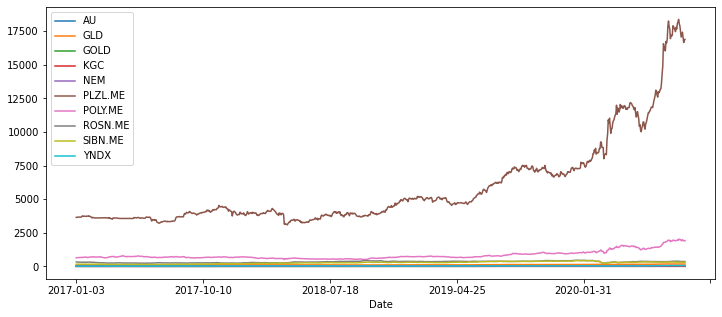

In [ ]:
print(df.shape)
# обращаю внимание что часть цен дается в USD, а на российские компании - в рублях
df.plot(figsize=(12, 5))

In [ ]:
df.describe()

,AU,GLD,GOLD,KGC,NEM,PLZL.ME,POLY.ME,ROSN.ME,SIBN.ME,YNDX
count,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000
mean,14.462522,131.085255,16.199485,4.315401,38.156863,5854.730126,837.095711,339.645016,276.282858,35.361540
std,6.434166,17.734179,4.620566,1.374739,9.773867,3288.846512,319.930615,59.863162,82.059980,8.169602
min,7.079522,110.470001,9.491576,2.430000,27.793959,3100.471924,507.914856,223.436966,138.527145,20.430000
25%,9.541533,119.400002,12.791006,3.490000,31.896486,3749.149170,658.832947,274.066711,199.478989,30.740000
50%,11.674978,123.440002,15.603015,4.000000,35.118645,4398.008301,715.988342,357.499146,288.129852,34.400002
75%,19.316679,140.449997,17.857508,4.620000,38.479015,7034.645996,947.143372,382.893860,326.101135,38.770000
max,37.910000,193.889999,30.459999,9.870000,70.102516,18372.000000,2031.390259,464.204620,443.692749,68.230003


### Статистика ИЗМЕННЕНИЯ ЦЕН


Вычислим количество значений, среднее значение, стандартное отклонение, минимум, максимум, и даже 25-й, 50-й и 75-й процентиль для обеих серий

-----
В будущем необходимо изучить корреляцию плавающих средних этих значение. Возможно, придется поэкспериментировать с шагом

In [ ]:
dailyChange.describe()

,AU,GLD,GOLD,KGC,NEM,PLZL.ME,POLY.ME,ROSN.ME,SIBN.ME,YNDX
count,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000
mean,0.001523,0.000555,0.000929,0.001484,0.000953,0.001768,0.001329,0.000231,0.000772,0.001470
std,0.031411,0.008089,0.022379,0.029997,0.019683,0.018620,0.019687,0.017478,0.016024,0.025677
min,-0.205929,-0.053694,-0.112920,-0.153846,-0.111161,-0.180100,-0.138992,-0.169106,-0.136115,-0.178094
25%,-0.014374,-0.003798,-0.010065,-0.013550,-0.007759,-0.006483,-0.007919,-0.007580,-0.006122,-0.010658
50%,0.000000,0.000572,0.000504,0.000000,0.000499,0.000000,0.001154,0.000000,0.000000,0.001624
75%,0.016709,0.004604,0.011141,0.014970,0.010064,0.010124,0.010040,0.007722,0.007524,0.014360
max,0.232181,0.048530,0.151802,0.190000,0.140182,0.130298,0.161561,0.129915,0.120833,0.159166


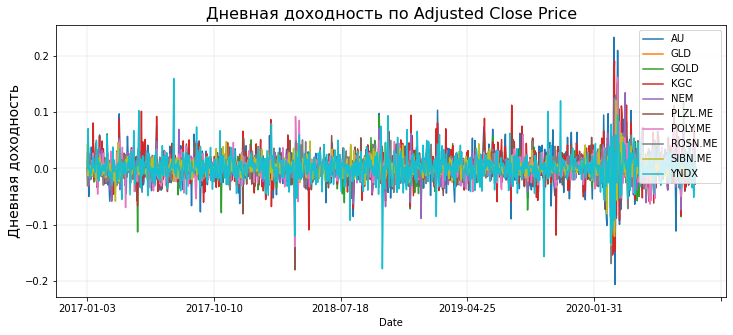

In [ ]:
# График дневных доходностей золотодобывающих компаний
dailyChange.plot(figsize=(12, 5))
plt.legend()
plt.title("Дневная доходность по Adjusted Close Price", fontsize=16)
plt.ylabel('Дневная доходность', fontsize=14)
plt.grid(linewidth=0.2) # Plot the grid lines
plt.show()

### Вычислим КУМУЛЯТИВНУЮ доходность

Кумулятивная дневная прибыль полезна для определения стоимости инвестиций через определенные промежуток времени

---
Что было бы, если вложить 1USD  в акцию а начале периода?

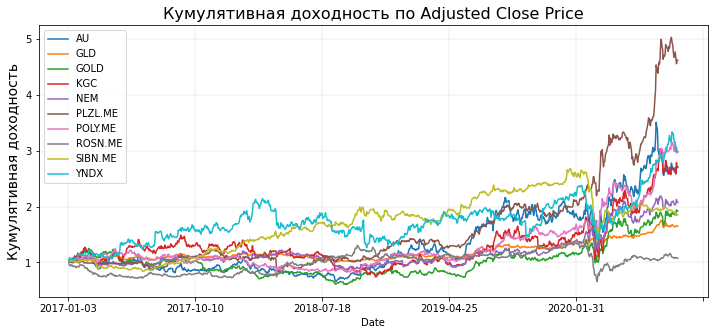

In [ ]:
# График Кумулятивной доходности
((df.pct_change()+1).cumprod()).plot(figsize=(12, 5))

plt.legend()
plt.title("Кумулятивная доходность по Adjusted Close Price", fontsize=16)
plt.ylabel('Кумулятивная доходность', fontsize=14)
plt.grid(linewidth=0.2)
plt.show()

## Решение задачи регрессии с помощью Нейросетей

In [8]:
from keras.models import Model, Sequential
from keras.optimizers import Adam, RMSprop, Adamax, Nadam
from keras.layers import concatenate, Input, Dense, BatchNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, LambdaCallback
from tensorflow.keras.models import load_model

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler #Нормировщики
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator # для генерации выборки временных рядов

from keras.utils import plot_model

### Готовлю данные

In [9]:
Y = dailyChange['PLZL.ME'] # динамика изменения цен
#X = dailyChange.iloc[:len(Y)][['AU', 'GLD', 'GOLD', 'KGC', 'NEM', 'POLY.ME']]
X = dailyChange.iloc[:len(Y)][['AU', 'GLD', 'GOLD', 'KGC', 'NEM', 'POLY.ME', 'SIBN.ME', 'ROSN.ME', 'YNDX']]

Y = Y.values # переводим в numpy.ndarray
X = X.values # переводим в numpy.ndarray

xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size=0.05, shuffle=False)
print('xTest: ', xTest.shape, '\tyTest: ', yTest.shape)
print( 'xTrain: ', xTrain.shape, '\tyTrain: ', yTrain.shape)

xTest:  (49, 9) 	yTest:  (49,)
xTrain:  (912, 9) 	yTrain:  (912,)


In [ ]:
#Масштабируем данные (отдельно для X и Y), чтобы их легче было скормить сетке
#xScaler = MinMaxScaler()
#xScaler.fit(xTrain)
#xTrain = xScaler.transform(xTrain)
#xTest = xScaler.transform(xTest)

#yScaler = MinMaxScaler()
#yTrain,yTest = yTrain.reshape(len(yTrain),(-1,1)), yTest.reshape(len(yTrain),(-1,1))
#yScaler.fit(yTrain)
#yTrain = yScaler.transform(yTrain)
#yTest = yScaler.transform(yTest)
#print()

In [ ]:
#print('xTrain: ', xTrain[:5], '\nyTrain: ', yTrain[:5])

### Простая сеть Dense

In [10]:
### Пишем коллбэк по минимизации отклонения предсказания цены в рублях
def on_epoch_end(epoch, logs):
  yPred = model.predict([xTest])
  #pred = model.predict([xTrainScaled[valMask], xTrainC01[valMask]]) #Полуаем выход сети на проверочно выборке
  #predUnscaled = yScaler.inverse_transform(pred).flatten() #Делаем обратное нормирование выхода к изначальным величинам цен квартир
  #yTrainUnscaled = yScaler.inverse_transform(yTrainScaled[valMask]).flatten() #Делаем такое же обратное нормирование yTrain к базовым ценам
  #delta = yTest - yPred #Считаем разность предсказания и правильных цен
  absDelta = float(abs(sum(yPred)-sum(yTest)/len(yTest))) #Берём модуль отклоненияsum(absDelta)/len(absDelta)
  print("Эпоха", epoch, "модуль ошибки", round(absDelta, 3)) #Выводим усреднённую ошибку

# Коллбэки
pltMae = LambdaCallback(on_epoch_end=on_epoch_end)


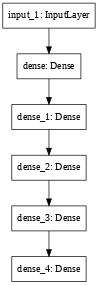

In [12]:
0# define model

input = Input(xTest.shape[1],) # В input указать надо форму массива которая будет подаваться
x = Dense(1000, activation='relu')(input)
#x = Dropout(0.4)(x)
x = Dense(10000, activation='relu')(x)    #10000
x = Dense(10000, activation='relu')(x)    #10000
x = Dense(1000, activation='relu')(x)      #1000
x = Dense(1, activation='linear')(x)
model = Model(input, x)

plot_model(model, dpi=50)

In [19]:
#model.save('PLZL_Dense.h5') 
model = load_model('PLZL_Dense.h5')

In [16]:
model.compile(optimizer=RMSprop(learning_rate=0.0001), loss='mse')

# коллбэки
early_stopping = EarlyStopping(monitor = 'loss', patience = 10, verbose = 0, restore_best_weights = True)
#Checkpoint = ModelCheckpoint('PLZL_Dense___.h5', monitor = 'loss', verbose=1, save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.1, patience=5, min_lr=1e-05, verbose = 1)

# fit model
history = model.fit(xTrain, yTrain, epochs=200, verbose=0,
                    validation_data=([xTest, yTest]),
                    callbacks = [early_stopping, reduce_lr, pltMae])


Эпоха 0 модуль ошибки 0.166
Эпоха 1 модуль ошибки 0.549
Эпоха 2 модуль ошибки 0.649
Эпоха 3 модуль ошибки 0.083
Эпоха 4 модуль ошибки 0.131

Epoch 00006: ReduceLROnPlateau reducing learning rate to 1e-05.
Эпоха 5 модуль ошибки 0.776
Эпоха 6 модуль ошибки 0.133
Эпоха 7 модуль ошибки 0.139
Эпоха 8 модуль ошибки 0.088
Эпоха 9 модуль ошибки 0.099
Эпоха 10 модуль ошибки 0.121
Эпоха 11 модуль ошибки 0.138
Эпоха 12 модуль ошибки 0.013
Эпоха 13 модуль ошибки 0.13
Эпоха 14 модуль ошибки 0.125
Эпоха 15 модуль ошибки 0.065
Эпоха 16 модуль ошибки 0.029
Эпоха 17 модуль ошибки 0.084
Эпоха 18 модуль ошибки 0.115
Эпоха 19 модуль ошибки 0.167
Эпоха 20 модуль ошибки 0.133
Эпоха 21 модуль ошибки 0.007
Эпоха 22 модуль ошибки 0.155
Эпоха 23 модуль ошибки 0.003
Эпоха 24 модуль ошибки 0.087
Эпоха 25 модуль ошибки 0.103
Эпоха 26 модуль ошибки 0.057
Эпоха 27 модуль ошибки 0.028
Эпоха 28 модуль ошибки 0.236
Эпоха 29 модуль ошибки 0.047
Эпоха 30 модуль ошибки 0.045
Эпоха 31 модуль ошибки 0.13
Эпоха 32 модуль оши

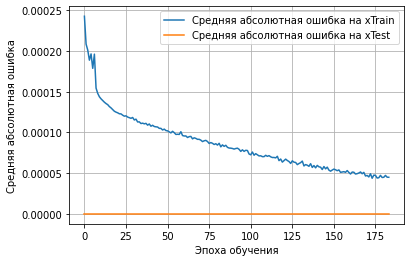

In [17]:
#Выводим графики ошибки
plt.plot(history.history['loss'], 
         label='Средняя абсолютная ошибка на xTrain')
plt.plot(history.history['val_loss'], 
         label='Средняя абсолютная ошибка на xTest')
plt.xlabel('Эпоха обучения')
plt.ylabel('Средняя абсолютная ошибка')
plt.legend()
plt.grid()
plt.show()

2/2 [==============================] - 0s 2ms/step

Средний модуль ошибки 0.293 условных единиц ;)



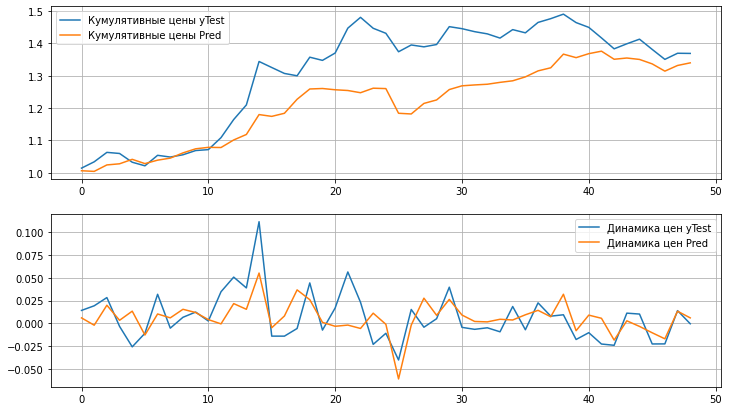

In [28]:
# demonstrate prediction
yPred = model.predict([xTest], verbose=1)

absDelta = float(abs(sum(yPred)-sum(yTest)/len(yTest))) #Берём модуль отклоненияsum(absDelta)/len(absDelta)
print('\nСредний модуль ошибки', round(absDelta, 3), 'условных единиц ;)\n')

#Выводим графики ошибки
ax1 = plt.subplot2grid(shape=(2,1), loc=(0,0)) # и ax2 - нижняя строка
ax1 = plt.plot((yTest+1).cumprod(), label='Кумулятивные цены yTest')
ax1 = plt.plot((yPred+1).cumprod(), label='Кумулятивные цены Pred')
plt.legend()
plt.grid()

ax2 = plt.subplot2grid(shape=(2,1), loc=(1,0))
ax2 = plt.plot(yTest, label='Динамика цен yTest')
ax2 = plt.plot(yPred, label='Динамика цен Pred')
plt.legend()
plt.grid()

plt.gcf().set_size_inches(12,7)

In [23]:
absDelta = float(abs(sum(yPred)-sum(yTest)/len(yTest))) #Берём модуль отклоненияsum(absDelta)/len(absDelta)
print( "модуль ошибки", round(absDelta, 3))

модуль ошибки 0.293


## Решение задачи регрессии с помощью Pandas

### Графики распределения изменений цен на акции выбранных компаний

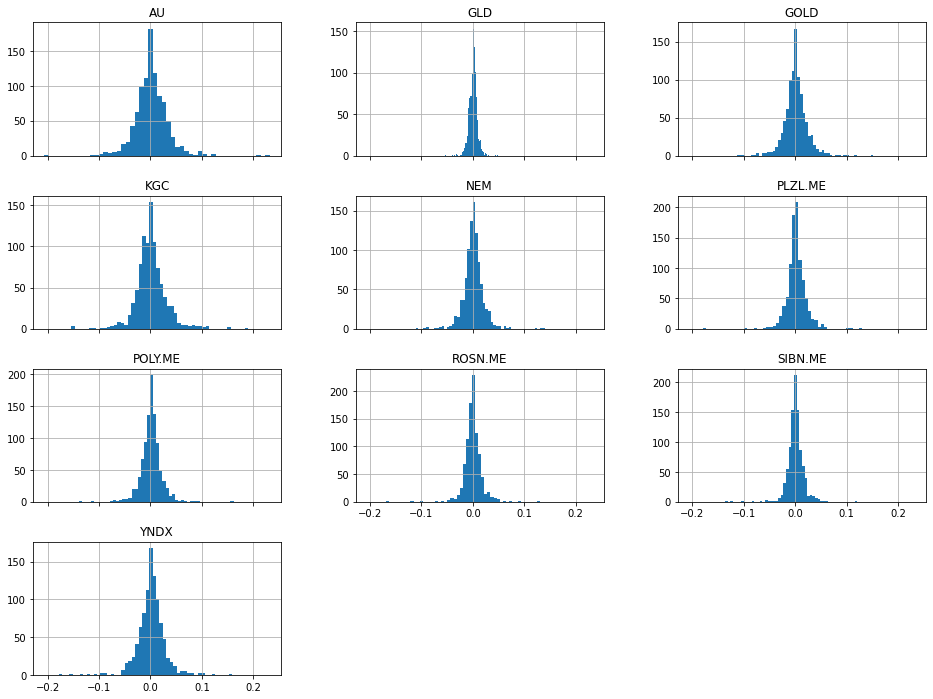

In [ ]:
# Распределение
dailyChange.hist(bins=50, sharex=True, figsize=(16, 12))

plt.show()

Более узкие кривые говорят о меньшей волатильности акций, чем более широкие кривые, имеющие асимметрию, последнее указывает на наличие тренда в сторону увеличения доходности или убыточности. Все это позволяет быстро сравнить любые две акции.

Еще один полезный график —матрица рассеяния. Ее можно легко построить при помощи функции scatter_matrix (), входящей в библиотеку pandas. В качестве аргументов используется daily_pct_change и устанавливается параметр Ядерной оценки плотности — Kernel Density Estimation. Кроме того, можно установить прозрачность с помощью параметра alpha и размер графика с помощью параметра figsize.

### Вычисление волатильности акций


Волатильность акции – это показатель, характеризующий изменчивость цены акции за определенный период времени. Обычно сравнивают волатильность одной акции с волатильностью другой акции, чтобы определить, какая из них имеет меньший риск, или с индексом волатильности, чтобы сравнить волатильность акций с волатильностью рынка в целом.

Как правило, чем выше волатильность, тем рискованнее инвестиции в эту акции.

Волатильность рассчитывается на основе скользящего стандартного отклонения от процентного изменения акции (и масштабируется относительно размера окна). Ширина окна влияет на общий результат. Чем шире окно, тем менее репрезентативным будет измерение. Когда окно сужается, результат приближается к стандартному отклонению. Выбрать правильный размер окна, основываясь на частоте дискретизации данных, это в некотором смысле искусство

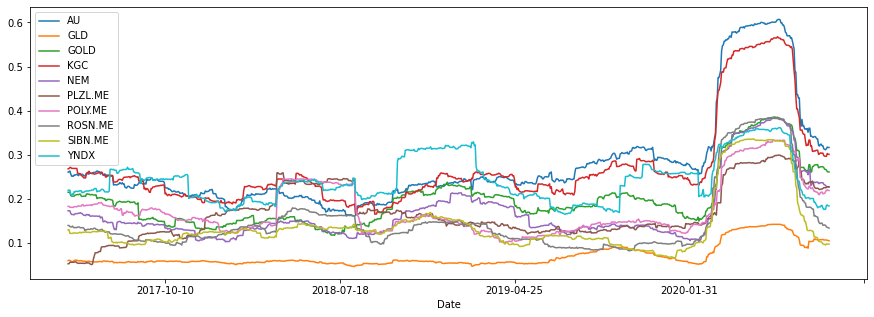

In [ ]:
period = 90 # Определяю рассматриваемый период

# Вычисляю волатильность дневных доходностей
vol = dailyChange.rolling(period).std() * np.sqrt(period) 

# Строю график
vol.plot(figsize=(15, 5))
plt.show()

### Расчет корреляции между котировками с помощью Pandas

Чем выше корреляция, тем больше у нас возможностей спрогнозировать изменение одной переменной, основываясь на изменении другой переменной.

Точную корреляцию между столбцами данных в объекте DataFrame можно вычислить с помощью метода .corr(). В результате мы получим матрицу всех возможных корреляций между переменными, представленными столбцами.

In [ ]:
# Используем дневные доходности акций
corrs = dailyChange.corr()
corrs

,AU,GLD,GOLD,KGC,NEM,PLZL.ME,POLY.ME,ROSN.ME,SIBN.ME,YNDX
AU,1.000000,0.660440,0.721327,0.727686,0.699432,0.186940,0.302307,0.090171,0.035574,0.101373
GLD,0.660440,1.000000,0.702144,0.659597,0.644005,0.240806,0.382615,0.079190,0.029452,0.035619
GOLD,0.721327,0.702144,1.000000,0.756452,0.781071,0.179140,0.309505,0.081044,-0.016310,0.119128
KGC,0.727686,0.659597,0.756452,1.000000,0.736178,0.130891,0.219329,0.059317,-0.007705,0.097183
NEM,0.699432,0.644005,0.781071,0.736178,1.000000,0.165371,0.290232,0.065110,-0.017311,0.178996
PLZL.ME,0.186940,0.240806,0.179140,0.130891,0.165371,1.000000,0.520920,0.109317,0.082153,0.132877
POLY.ME,0.302307,0.382615,0.309505,0.219329,0.290232,0.520920,1.000000,0.113627,0.085282,0.111464
ROSN.ME,0.090171,0.079190,0.081044,0.059317,0.065110,0.109317,0.113627,1.000000,0.581342,0.168464
SIBN.ME,0.035574,0.029452,-0.016310,-0.007705,-0.017311,0.082153,0.085282,0.581342,1.000000,0.172054
YNDX,0.101373,0.035619,0.119128,0.097183,0.178996,0.132877,0.111464,0.168464,0.172054,1.000000


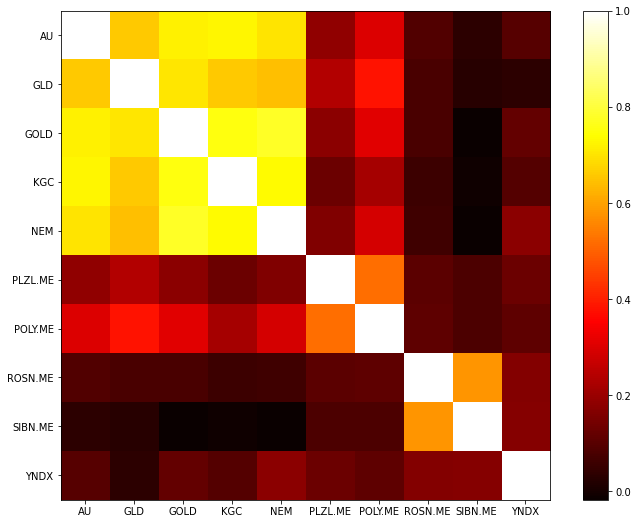

In [ ]:
# строим теплокарту корреляционной матрицы
plt.imshow(corrs, cmap='hot', interpolation='none') 
plt.colorbar()
plt.xticks(range(len(corrs)), corrs.columns) 
plt.yticks(range(len(corrs)), corrs.columns) 
plt.gcf().set_size_inches(12,9)

Интересно, что прослеживается крайне слабая корреляция росскийких PLZL и POLY с их иностранными "коллегами". Возможно это связано с тем, то их интеграция в мировые финансы только начинается?

Также заметно, что роль строимости серебра в стоимости акций существенно ниже, чем золота

### Линейная регрессия

инейная регрессия используется в качестве прогнозирующей модели, когда предполагается линейная зависимость между зависимой переменной (переменная, которую мы пытаемся предсказать) и независимой переменной (переменная и/или переменные, используемые для предсказания).

В действительности так же может существовать связь между зависимой переменной и несколькими независимыми переменными. Для этих типов моделей (при условии линейности) мы можем использовать множественную линейную регрессию следующего вида

Бета — коэффициент. 
Если не вдаваться в подробности, то можно его охарактеризовать следующим образом:

Акции c бета-коэффициентом:
- 0 указывает на отсутствие корреляции между акцией и индексом
- 1 указывает на то, что акция имеет ту же волатильность, что и индекс
- больше одного — указывает на большую доходность (а следовательно и риски) акции, чем индекс
- менее единицы — менее волатильная акция, чем индекса

Другими словами, если акция увеличится на 14%, в то время как рынок вырос всего на 10%, то бета-коэффициент акции составит 1,4. Как правило на рынках с более высоким бета-коэффициентом можно предположить лучшие условия для вознаграждения (а следовательно и для риска)

https://habrastorage.org/webt/-e/yf/ky/-eyfkygh_enn9wusk29gg2gyot8.png![image.png](attachment:image.png)


In [ ]:
import statsmodels.api as sm

# Создание модели взаимосвязей между PLZL и POLY
model = sm.OLS(dailyChange['PLZL.ME'], dailyChange['POLY.ME']).fit()
print(model.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                                 OLS Regression Results                                
Dep. Variable:                PLZL.ME   R-squared (uncentered):                   0.274
Model:                            OLS   Adj. R-squared (uncentered):              0.274
Method:                 Least Squares   F-statistic:                              362.9
Date:                Fri, 11 Sep 2020   Prob (F-statistic):                    6.93e-69
Time:                        07:28:11   Log-Likelihood:                          2614.8
No. Observations:                 961   AIC:                                     -5228.
Df Residuals:                     960   BIC:                                     -5223.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
# То же самое, но с помощью другой библиотеки
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(dailyChange['PLZL.ME'], dailyChange['POLY.ME'])

print(slope, intercept, r_value, p_value, std_err)

0.5507811193863354 0.0003552925373574246 0.5209198244688399 5.870217862584218e-68 0.029144466888719363


### Плавающая корреляция курсов акций и цен на Золото

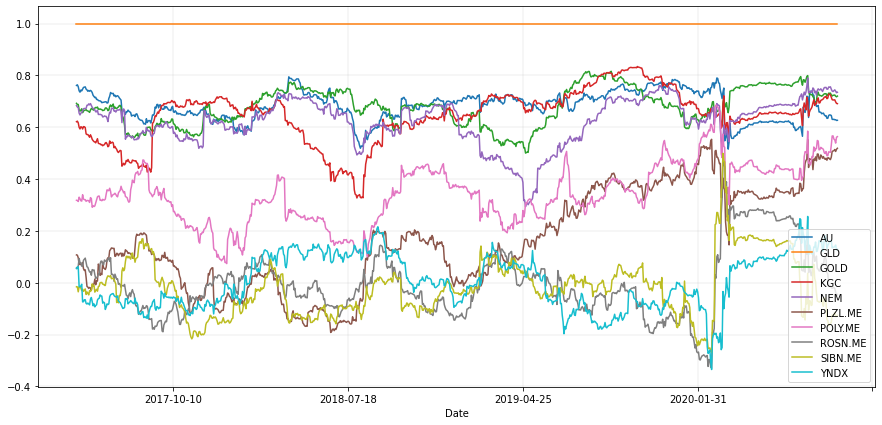

In [ ]:
# Считаю rolling correlation от цены на Золото

period = 90
rollCorr = dailyChange.rolling(window=period).corr(dailyChange['GLD'])

# Строю график
rollCorr.plot(figsize=(15, 7))
plt.grid(linewidth=0.2)
plt.show()

Корреляция ДНЕВНЫХ ДОХОДНОСТЕЙ с ценами на Золото усиливается

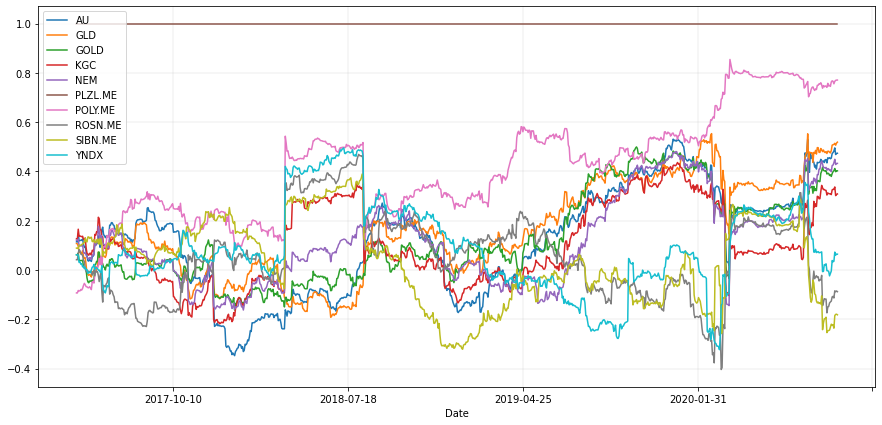

In [ ]:
# Считаю rolling correlation от цены на PLZL

period = 90
rollCorr = dailyChange.rolling(window=period).corr(dailyChange['PLZL.ME'])

# Строю график
rollCorr.plot(figsize=(15, 7))
plt.grid(linewidth=0.2)
plt.show()

Растет связь с ценой Полиметалла. А вот с нефтью или it связи практически никакой, а временами - слабая обратная.

## Примеры дополнительных данных, которые можно применить в анализе

Technical Analysis Library in Python https://github.com/bukosabino/ta?source=post_page-----4b2b390d3543----------------------

https://ta-lib.org

http://mrjbq7.github.io/ta-lib/

A Simple Trading Strategy https://www.datacamp.com/community/tutorials/finance-python-trading#gs.8u7rQvs

### Дополнительная статистика из Yahoo Finance

In [ ]:
LMT = yf.Ticker("LMT") # Lockheed Martin
LMT.history(period="max")

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1977-01-03,0.34,0.35,0.34,0.35,165200.0,0.0,0.0
1977-01-04,0.35,0.35,0.33,0.35,179800.0,0.0,0.0
1977-01-05,0.35,0.36,0.35,0.36,189600.0,0.0,0.0
1977-01-06,0.36,0.38,0.36,0.38,384200.0,0.0,0.0
1977-01-07,0.38,0.38,0.37,0.38,345200.0,0.0,0.0
...,...,...,...,...,...,...,...
2020-09-03,399.50,401.88,383.38,386.29,1500800.0,0.0,0.0
2020-09-04,388.51,391.55,379.58,385.02,933600.0,0.0,0.0
2020-09-08,383.99,385.29,378.36,380.23,1071600.0,0.0,0.0


In [ ]:
LMT.sustainability

,Value
2020-8,
palmOil,False
controversialWeapons,True
gambling,False
socialScore,16.09
nuclear,False
furLeather,False
alcoholic,False
gmo,False
catholic,False


In [ ]:
LMT.institutional_holders

,Holder,Shares,Date Reported,% Out,Value
0,State Street Corporation,42435377,2020-06-29,0.1518,15485517774
1,"Vanguard Group, Inc. (The)",22246588,2020-06-29,0.0796,8118224892
2,Blackrock Inc.,16985580,2020-06-29,0.0608,6198377853
3,Capital World Investors,16595630,2020-06-29,0.0594,6056077299
4,"Wellington Management Company, LLP",10758413,2020-06-29,0.0385,3925960071
5,Bank of America Corporation,9017771,2020-06-29,0.0323,3290764993
6,"Geode Capital Management, LLC",4094244,2020-06-29,0.0146,1494071520
7,"Ameriprise Financial, Inc.",3371326,2020-06-29,0.0121,1230264283
8,"FMR, LLC",3368655,2020-06-29,0.0121,1229289582
9,Northern Trust Corporation,3167070,2020-06-29,0.0113,1155727184


In [ ]:
LMT.major_holders

,0,1
0,0.07%,% of Shares Held by All Insider
1,80.38%,% of Shares Held by Institutions
2,80.44%,% of Float Held by Institutions
3,2142,Number of Institutions Holding Shares


In [ ]:
LMT.recommendations

,Firm,To Grade,From Grade,Action
Date,,,,
2011-12-30 02:00:00,Guggenheim,Sell,,down
2012-04-11 06:24:00,Deutsche Bank,Hold,,main
2012-04-27 07:13:00,Credit Suisse,Neutral,,main
2012-04-27 08:33:00,JP Morgan,Neutral,,main
2012-07-17 07:16:00,Citigroup,Buy,,main
...,...,...,...,...
2020-03-25 15:03:44,Morgan Stanley,Equal-Weight,,main
2020-04-14 14:41:13,Morgan Stanley,Equal-Weight,,main
2020-04-22 12:20:34,Credit Suisse,Neutral,,main
